In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# creating database connection
conn = sqlite3.connect("airbnb_nyc.db")

In [6]:
# Load CSV and write to SQLite table
df_csv = pd.read_csv("../data/AB_NYC_2019.csv")
df_csv.to_sql("airbnb_data", conn, if_exists="replace", index=False)

48895

In [7]:
# Check tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
print("Tables in DB:\n", tables)

Tables in DB:
           name
0  airbnb_data


In [8]:
# Explore table structure
for table in tables['name']:
    print('-'*50, f'Table: {table}', '-'*50)
    count = pd.read_sql_query(f"SELECT COUNT(*) AS count FROM {table}", conn).iloc[0,0]
    print(f"Total records: {count}")
    display(pd.read_sql_query(f"SELECT * FROM {table} LIMIT 5", conn))

-------------------------------------------------- Table: airbnb_data --------------------------------------------------
Total records: 48895


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,None,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Example queries:

In [9]:
# Listings per neighbourhood group
neigh_counts = pd.read_sql_query(
    "SELECT neighbourhood_group, COUNT(*) AS total_listings FROM airbnb_data GROUP BY neighbourhood_group", conn
)
print(neigh_counts)

  neighbourhood_group  total_listings
0               Bronx            1091
1            Brooklyn           20104
2           Manhattan           21661
3              Queens            5666
4       Staten Island             373


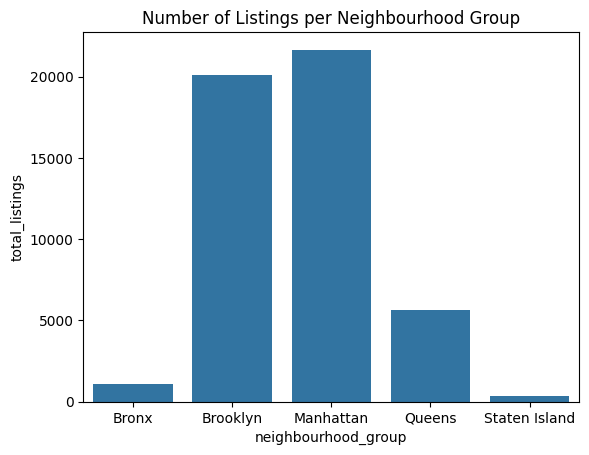

In [11]:
# Plot
sns.barplot(data=neigh_counts, x='neighbourhood_group', y='total_listings')
plt.title("Number of Listings per Neighbourhood Group")
plt.show()

In [12]:
# Average price per neighbourhood group
avg_price = pd.read_sql_query(
    "SELECT neighbourhood_group, AVG(price) AS avg_price FROM airbnb_data GROUP BY neighbourhood_group", conn
)
print(avg_price)

  neighbourhood_group   avg_price
0               Bronx   87.496792
1            Brooklyn  124.383207
2           Manhattan  196.875814
3              Queens   99.517649
4       Staten Island  114.812332


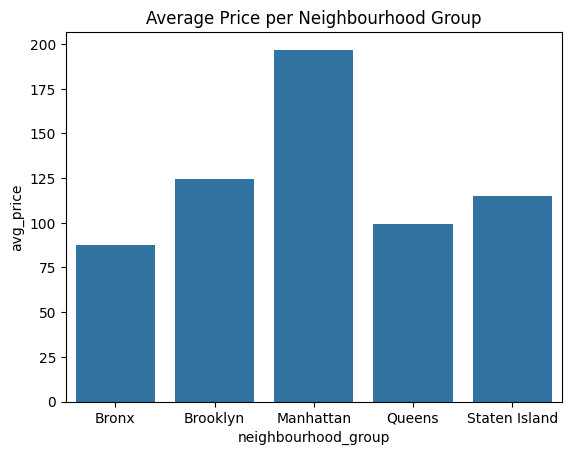

In [13]:
# Plot
sns.barplot(data=avg_price, x='neighbourhood_group', y='avg_price')
plt.title("Average Price per Neighbourhood Group")
plt.show()

In [14]:
# Filter: high-priced Manhattan listings (> $500)
high_price_manhattan = pd.read_sql_query(
    "SELECT * FROM airbnb_data WHERE neighbourhood_group='Manhattan' AND price > 500", conn
)
print("High-priced Manhattan listings:")
display(high_price_manhattan.head())

High-priced Manhattan listings:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,68974,Unique spacious loft on the Bowery,281229,Alicia,Manhattan,Little Italy,40.71943,-73.99627,Entire home/apt,575,2,191,2019-06-20,1.88,1,298
1,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0
2,248871,4 BEDROOM -2BATHRM WEST VILLAGE DUPLEX TOWNHOUSE,605463,West Village,Manhattan,West Village,40.73066,-74.00287,Entire home/apt,700,3,131,2019-06-24,1.40,4,296
3,250801,Heart & Soul of Greenwich Village,1314834,Rhona,Manhattan,Greenwich Village,40.73129,-73.99944,Entire home/apt,850,3,107,2019-05-23,1.15,1,249
4,256328,Luxury Chelsea Townhouse at the High Line,1347034,Janine,Manhattan,Chelsea,40.74599,-74.00253,Entire home/apt,760,2,7,2019-06-22,0.08,1,361


In [15]:
# Closing the connection
conn.close()